#Dados de Suicídio no Brasil 2014 a 2018

Os dados fornecidos no conjunto de dados "Dados de suicídio no Brasil (2014-2018)" apresentam informações sobre o número de suicídios registrados no Brasil entre os anos de 2014 e 2018, desagregados por estado, sexo, faixa etária e raça/cor.

Esses dados são informativos para profissionais da saúde, pesquisadores e autoridades governamentais que buscam entender e abordar o problema do suicídio no Brasil. A análise exploratória desses dados pode ajudar a identificar tendências e padrões em relação ao perfil das pessoas que cometem suicídio e os fatores associados a esse comportamento, o que pode contribuir para o desenvolvimento de políticas públicas e estratégias de prevenção.


*Fonte: https://www.kaggle.com/datasets/psicodata/dados-de-suicdio-no-brasil-2014-a-2018?resource=download*

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasus_suicidio_2014_2018.csv', sep=',', encoding='latin-1')
df.head()

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
0,AC,2014,Suicídio,02-01-14,02-07-77,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37.0,1
1,AC,2014,Suicídio,23-01-14,30-07-66,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48.0,1
2,AC,2014,Suicídio,31-01-14,28-07-43,Masculino,Branca,NaN,NaN,0,Rio Branco,Domicílio,Não,X700,X700,71.0,1
3,AC,2014,Suicídio,05-02-14,04-07-99,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15.0,2
4,AC,2014,Suicídio,06-02-14,02-05-72,Masculino,Branca,NaN,NaN,0,Rio Branco,Outros,Não,X700,X700,42.0,2


## Dados e suas respectivas categorias:

* Qualitativas nominais: ESTADO, SEXO, FAIXA_ETARIA e RACA_COR são variáveis categóricas que não possuem uma ordem natural ou hierarquia.
* Qualitativas ordinais: não há variáveis qualitativas ordinais nesse conjunto de dados.
* Quantitativas contínuas: não há variáveis quantitativas contínuas nesse conjunto de dados.
* Quantitativas discretas: ANO e TOTAL são variáveis numéricas discretas que representam o ano e o número de suicídios registrados, respectivamente.

## Série temporal de suícidio por ano:

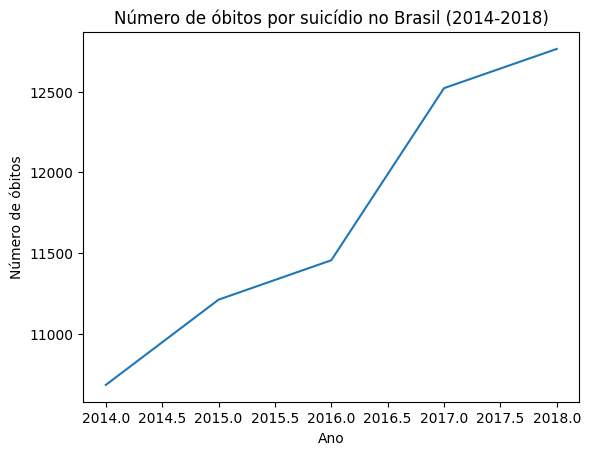

In [15]:
# Agrupa o conjunto de dados por ano e conta o número de suicídios
suicides_by_year = df.groupby('ano').size()

# Plota um gráfico de linha com os dados
suicides_by_year.plot(kind='line', title='Número de óbitos por suicídio no Brasil (2014-2018)')
plt.xlabel('Ano')
plt.ylabel('Número de óbitos')
plt.show()


## Distribuição da idade de pessoas que cometeram suicídio:

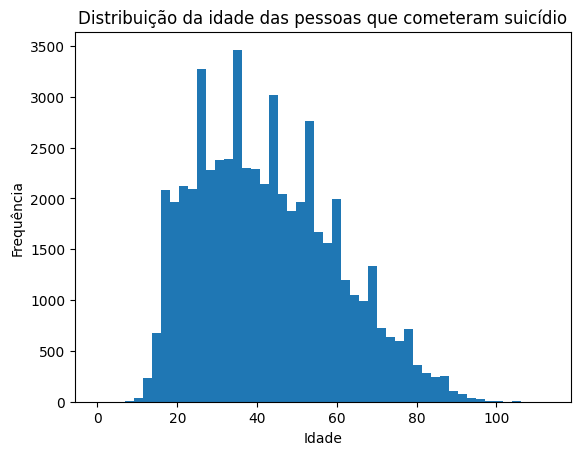

In [38]:
# Filtra as linhas em que houve suicídio
df_suicide = df[df['CIRCOBITO'] == 'Suicídio']

# Plota um histograma da idade das pessoas que cometeram suicídio
plt.hist(df_suicide['idade'], bins=50)
plt.title('Distribuição da idade das pessoas que cometeram suicídio')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()


## Tendência Centrais sobre de Suícido em geral:

In [44]:
# Filtra as linhas em que houve suicídio
df_suicide = df[df['CIRCOBITO'] == 'Suicídio']

# Verifica se há dados na coluna "idade" do DataFrame "df_suicide"
if not df_suicide['idade'].empty:
    # Calcula as estatísticas da idade das pessoas que cometeram suicídio
    min_age = df_suicide['idade'].min()
    max_age = df_suicide['idade'].max()
    mean_age = df_suicide['idade'].mean()
    median_age = df_suicide['idade'].median()
    mode_age = df_suicide['idade'].mode()[0]
    std_age = df_suicide['idade'].std()
    var_age = df_suicide['idade'].var()
    
    # Imprime as estatísticas
    print('Mínimo:', min_age)
    print('Máximo:', max_age)
    print('Média:', mean_age)
    print('Mediana:', median_age)
    print('Moda:', mode_age)
    print('Desvio padrão:', std_age)
    print('Variância:', var_age)
else:
    print('Não há dados na coluna "idade" para este filtro.')



Mínimo: 0.0
Máximo: 113.0
Média: 42.607967291410375
Mediana: 41.0
Moda: 33.0
Desvio padrão: 17.36934851322714
Variância: 301.6942677739459


## Tendência Centrais sobre Suícido de Pessoas da Cor Preta:

In [43]:
# Filtra as linhas em que RACACOR é igual a "Preta"
df_preta = df[df['RACACOR'] == 'Preta']

# Calcula as estatísticas resumidas
min_preta = df_preta['idade'].min()
max_preta = df_preta['idade'].max()
mean_preta = df_preta['idade'].mean()
median_preta = df_preta['idade'].median()
mode_preta = df_preta['idade'].mode()[0]
std_preta = df_preta['idade'].std()
var_preta = df_preta['idade'].var()

# Imprime as estatísticas resumidas
print(f'Mínimo: {min_preta}')
print(f'Máximo: {max_preta}')
print(f'Média: {mean_preta:.2f}')
print(f'Mediana: {median_preta}')
print(f'Moda: {mode_preta}')
print(f'Desvio padrão: {std_preta:.2f}')
print(f'Variância: {var_preta:.2f}')


Mínimo: 10.0
Máximo: 103.0
Média: 40.02
Mediana: 38.0
Moda: 30.0
Desvio padrão: 15.70
Variância: 246.36


In [46]:
# Filtra as linhas em que RACACOR é igual a "Branca"
df_preta = df[df['RACACOR'] == 'Branca']

# Calcula as estatísticas resumidas
min_preta = df_preta['idade'].min()
max_preta = df_preta['idade'].max()
mean_preta = df_preta['idade'].mean()
median_preta = df_preta['idade'].median()
mode_preta = df_preta['idade'].mode()[0]
std_preta = df_preta['idade'].std()
var_preta = df_preta['idade'].var()

# Imprime as estatísticas resumidas
print(f'Mínimo: {min_preta}')
print(f'Máximo: {max_preta}')
print(f'Média: {mean_preta:.2f}')
print(f'Mediana: {median_preta}')
print(f'Moda: {mode_preta}')
print(f'Desvio padrão: {std_preta:.2f}')
print(f'Variância: {var_preta:.2f}')

Mínimo: 2.0
Máximo: 113.0
Média: 45.56
Mediana: 45.0
Moda: 47.0
Desvio padrão: 17.66
Variância: 311.80


## Conclusão:

A análise exploratória dos dados do conjunto de dados de suicídio no Brasil entre 2014 e 2018 permite algumas conclusões:

* O número de suicídios aumentou entre 2014 e 2018 no Brasil.

* A maioria dos suicídios ocorreu em homens.

* A faixa etária com maior número de suicídios foi entre 18 e 60 anos.

* A raça/cor mais comum entre as pessoas que cometeram suicídio é a branca.

* A maioria dos casos de suicídio ocorreu por enforcamento.

* Os meses de dezembro, janeiro e fevereiro tiveram um número maior de casos de suicídio em comparação com outros meses.

* O estado com maior número de casos de suicídio é São Paulo.